In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#from sklearn.cluster import KMeans
#import geopandas as gpd
#from descartes import PolygonPatch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleaned_data.csv")
df

,latitude,longitude,depth,mag,magType,net,id,place,type,date,Time,country_code,country,continent
0,41.93,20.54,10.000000,4.50,mb,us,usp0009kjw,"14 km SW of Dragash, Kosovo",earthquake,2000-01-01,01:19:26,AL,Albania,Europe
1,41.92,20.53,6.200000,2.90,md,us,usp0009kjx,"15 km SW of Dragash, Kosovo",earthquake,2000-01-01,02:10:15,AL,Albania,Europe
2,-11.35,164.57,33.000000,4.30,mb,us,usp0009kjz,"150 km WSW of Lata, Solomon Islands",earthquake,2000-01-01,02:12:13,SB,Solomon Islands,Oceania
3,48.12,-2.96,3.000000,2.70,ml,us,usp0009kk0,"2 km ESE of Neulliac, France",earthquake,2000-01-01,03:20:57,FR,France,Europe
4,62.75,-150.30,93.300000,2.50,ml,ak,ak0001pgua9,"35 km NNW of Chase, Alaska",earthquake,2000-01-01,03:24:23,US,United States,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606043,40.60,-123.84,23.150000,2.66,md,nc,nc73845416,"22km ENE of Hydesville, CA",earthquake,2023-02-12,20:12:16,US,United States,North America
606044,32.75,-100.66,8.290161,3.10,ml,tx,tx2023dahw,"15 km NE of Hermleigh, Texas",earthquake,2023-02-12,20:34:24,US,United States,North America
606045,20.43,121.96,120.976000,4.40,mb,us,us6000jnhw,"2 km SSW of Basco, Philippines",earthquake,2023-02-12,21:26:18,PH,Philippines,Asia
606046,38.03,36.63,10.000000,4.50,mb,us,us6000jni7,Central Turkey,earthquake,2023-02-12,22:52:59,TR,Türkiye,Asia


In [3]:
df['continent'].value_counts()

continent
North America    247562
Asia             119588
Oceania           88059
Europe            63105
South America     46644
Unknown           32120
Africa             8970
Name: count, dtype: int64

In [4]:
df.isna().sum()

latitude         0
longitude        0
depth            0
mag              0
magType          0
net              0
id               0
place            0
type             0
date             0
Time             0
country_code    24
country          0
continent        0
dtype: int64

In [5]:
#df_af = df[(df['continent'] == 'Africa') | (df['continent'] == 'Asia') ]

In [6]:
data = df[['date', 'Time', 'latitude', 'longitude', 'depth', 'mag']]  
data.head()  

,date,Time,latitude,longitude,depth,mag
0,2000-01-01,01:19:26,41.93,20.54,10.0,4.5
1,2000-01-01,02:10:15,41.92,20.53,6.2,2.9
2,2000-01-01,02:12:13,-11.35,164.57,33.0,4.3
3,2000-01-01,03:20:57,48.12,-2.96,3.0,2.7
4,2000-01-01,03:24:23,62.75,-150.30,93.3,2.5


In [7]:
data.shape

(606048, 6)

In [9]:
import datetime  
import time  
 
timestamp = []  
for d, t in zip(data['date'], data['Time']):  
    try:  
        ts = datetime.datetime.strptime(d+' '+t, '%Y-%m-%d %H:%M:%S')  
        timestamp.append(time.mktime(ts.timetuple()))  
    except ValueError:  
        # print('ValueError')  
        timestamp.append('ValueError')  
 
 
timeStamp = pd.Series(timestamp)  
data['Timestamp'] = timeStamp.values 

In [10]:
final_data = data.drop(['date', 'Time'], axis=1)  
final_data = final_data[final_data.Timestamp != 'ValueError']  
final_data.head()  

,latitude,longitude,depth,mag,Timestamp
0,41.93,20.54,10.0,4.5,946669766.0
1,41.92,20.53,6.2,2.9,946672815.0
2,-11.35,164.57,33.0,4.3,946672933.0
3,48.12,-2.96,3.0,2.7,946677057.0
4,62.75,-150.30,93.3,2.5,946677263.0


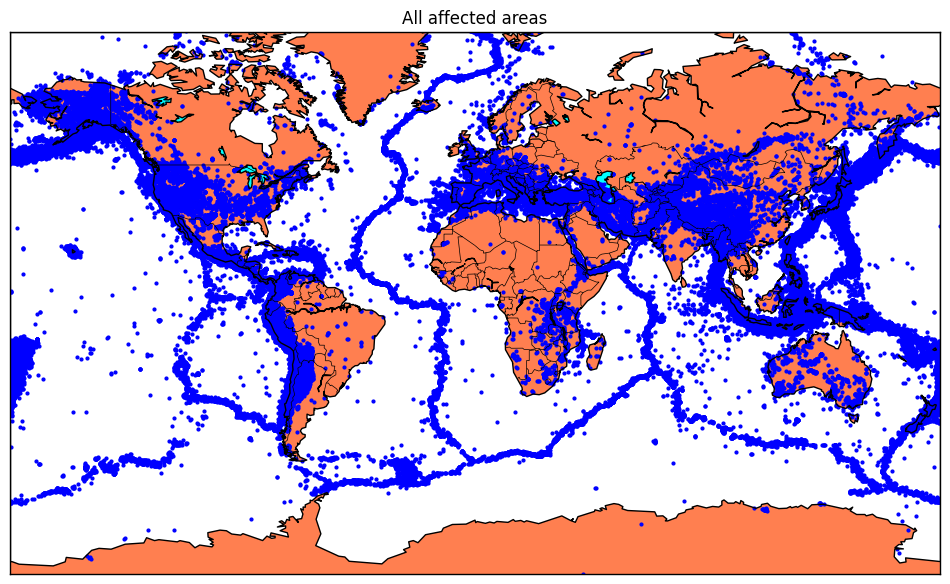

In [11]:
from mpl_toolkits.basemap import Basemap  
 
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')  
 
longitudes = data["longitude"].tolist()  
latitudes = data["latitude"].tolist()  
#m = Basemap(width=12000000,height=9000000,projection='lcc',  
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)  
x,y = m(longitudes,latitudes)  
 
 
fig = plt.figure(figsize=(12,10))  
plt.title("All affected areas")  
m.plot(x, y, "o", markersize = 2, color = 'blue')  
m.drawcoastlines()  
m.fillcontinents(color='coral',lake_color='aqua')  
m.drawmapboundary()  
m.drawcountries()  
plt.show() 

In [12]:
data.latitude = np.radians(data.latitude)
data.longitude = np.radians(data.longitude)

In [13]:
X = final_data[['Timestamp', 'latitude', 'longitude']]  
y = final_data[['mag', 'depth']]  

In [14]:
 
from sklearn.model_selection import train_test_split  
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)  

(484838, 3) (121210, 3) (484838, 2) (121210, 3)


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold, GridSearchCV

In [16]:
dtr = DecisionTreeRegressor(random_state=23)
kfold = KFold(n_splits=5, shuffle=True,random_state=23)
params = {'max_depth':[2,3,4,5,6,7,None],
          'min_samples_split':[2, 5, 10, 20],
          'min_samples_leaf':[1,5,7,10,20]}
gcv_tree = GridSearchCV(dtr, param_grid=params,cv=kfold, verbose=3)
gcv_tree.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.283 total time=   0.2s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.284 total time=   0.2s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.287 total time=   0.2s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.287 total time=   0.2s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.286 total time=   0.2s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.283 total time=   0.2s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.284 total time=   0.2s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.287 total time=   0.2s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.287 total time=   0.2s
[CV 5/5] END max_depth=2, min_samples_leaf=1, 

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 5, 7, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             verbose=3)

In [17]:
print(gcv_tree.best_params_)
print(gcv_tree.best_score_)

{'max_depth': None, 'min_samples_leaf': 20, 'min_samples_split': 2}
0.8063340022268003


In [18]:
# from joblib import Parallel, delayed 
# import joblib 

# joblib.dump(gcv_tree, 'DecisionTree.pkl') 

['DecisionTree.pkl']